In [8]:
import os 

os.environ["ISISROOT"] = "/usgs/cpkgs/anaconda3_linux/envs/isis3.7.0"

import pysis
from pysis import isis

import knoten
from knoten import vis

import json

import ale
ale.config['lro']='data'
from ale import util
from ale.drivers.lro_drivers import LroLrocPds3LabelNaifSpiceDriver
from ale.formatters.usgscsm_formatter import to_usgscsm

from IPython.display import Image

import plotly
plotly.offline.init_notebook_mode(connected=True)

In [9]:
url = 'http://pdsimage.wr.usgs.gov/Missions/Lunar_Reconnaissance_Orbiter/LROC/EDR/LROLRC_0018/DATA/EXT/2013354/NAC/M1142142198RE.IMG'

!wget -N -P data/ {url}
fileName = 'data/' + os.path.split(url)[1]

--2019-08-05 15:24:44--  http://pdsimage.wr.usgs.gov/Missions/Lunar_Reconnaissance_Orbiter/LROC/EDR/LROLRC_0018/DATA/EXT/2013354/NAC/M1142142198RE.IMG
Resolving pdsimage.wr.usgs.gov (pdsimage.wr.usgs.gov)... 8.27.177.76, 2001:1900:2200:19ff::76
Connecting to pdsimage.wr.usgs.gov (pdsimage.wr.usgs.gov)|8.27.177.76|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pdsimage2.wr.usgs.gov/Missions/Lunar_Reconnaissance_Orbiter/LROC/EDR/LROLRC_0018/DATA/EXT/2013354/NAC/M1142142198RE.IMG [following]
--2019-08-05 15:24:44--  https://pdsimage2.wr.usgs.gov/Missions/Lunar_Reconnaissance_Orbiter/LROC/EDR/LROLRC_0018/DATA/EXT/2013354/NAC/M1142142198RE.IMG
Resolving pdsimage2.wr.usgs.gov (pdsimage2.wr.usgs.gov)... 8.27.177.76, 2001:1900:2200:19ff::76
Connecting to pdsimage2.wr.usgs.gov (pdsimage2.wr.usgs.gov)|8.27.177.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259281864 (247M) [application/octet-stream]
Saving to: ‘data/M1142142198

In [10]:
# Set the output location of the resulting .cub
cub_loc = os.path.splitext(fileName)[0] + '.cub'

try: 
   isis.lronac2isis(from_=fileName, to=cub_loc)
except ProcessError as e:
   print(e.stderr)

try:
    isis.spiceinit(from_=cub_loc, shape='ellipsoid')
except ProcessError as e:
    print(e.stderr)
    
with LroLrocPds3LabelNaifSpiceDriver(fileName) as driver:
    print(driver.metakernel)
    usgscsmString = to_usgscsm(driver)
    usgscsm_dict = json.loads(usgscsmString)
    
    csm_isd = os.path.splitext(fileName)[0] + '.json'
    json.dump(usgscsm_dict, open(csm_isd, 'w'))

data/lro_2013.tm
----data/M1142142198RE.json


In [11]:
csmisis_diff_lv_plot, csmisis_diff_ephem_plot, external_orientation_data = vis.external_orientation_diff(csm_isd, cub_loc, 10, 50, 600, 600)

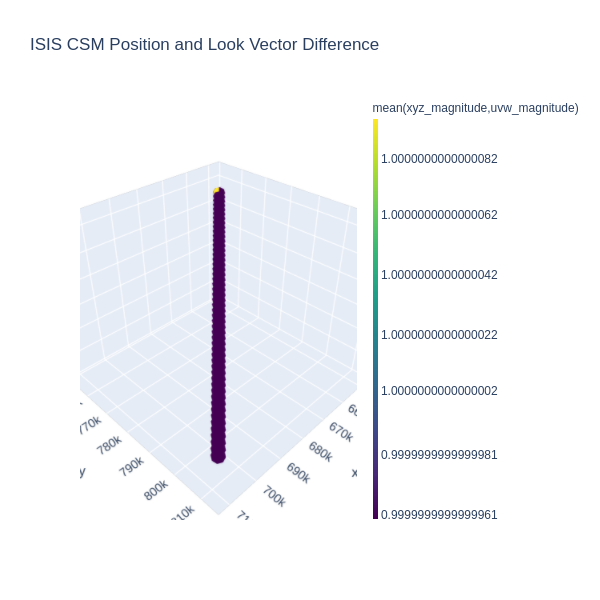

In [12]:
csmisis_diff_lv_plot_bytes = csmisis_diff_lv_plot.to_image(format="png")
csmisis_diff_ephem_plot_bytes = csmisis_diff_ephem_plot.to_image(format="png")
Image(csmisis_diff_lv_plot_bytes)


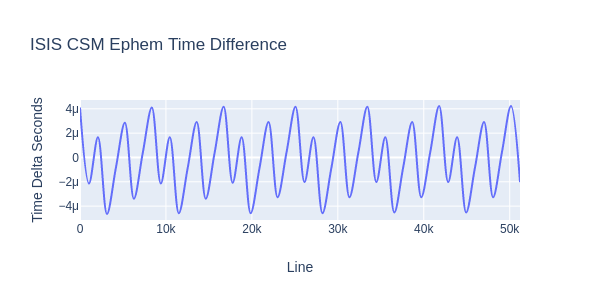

In [13]:
Image(csmisis_diff_ephem_plot_bytes)

In [14]:
external_orientation_data[['diffx', 'diffy', 'diffz', 'diffu', 'diffv', 'diffw']].describe()

,diffx,diffy,diffz,diffu,diffv,diffw
count,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,5.000000e+02
mean,-51.438058,41.229259,1.684784,-4.127150e-09,5.017380e-09,-4.741241e-10
std,0.250262,0.331815,0.071195,7.446965e-08,7.537137e-08,3.823529e-08
min,-51.853474,40.659275,1.563690,-2.192902e-07,-1.616644e-07,-1.615731e-07
25%,-51.655756,40.943069,1.623249,-2.808094e-08,-2.468144e-08,-6.494892e-09
50%,-51.442820,41.233116,1.684965,2.780555e-09,1.213644e-09,-3.676058e-10
75%,-51.222741,41.517376,1.746407,3.440942e-08,3.497846e-08,1.679794e-08
max,-51.004698,41.784701,1.805195,1.750705e-07,2.470604e-07,6.519280e-08


In [15]:
isis2csm_plot, csm2isis_plot, isiscsm_plotlatlon, isiscsm_plotbf, isis2csm_data, csm2isis_data, isiscsm_latlondata, isiscsm_bfdata = vis.reprojection_diff(csm_isd, cub_loc, 10, 50, 500, 500)

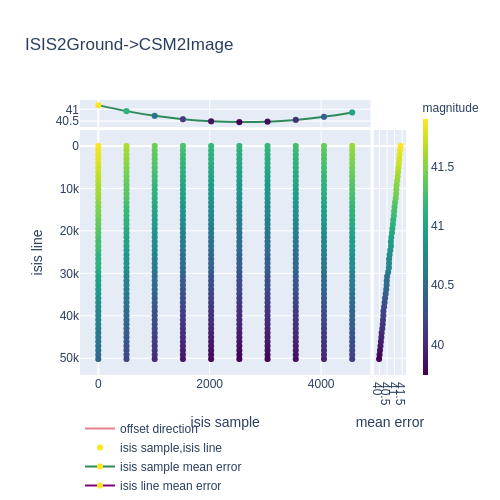

In [16]:
Image(isis2csm_plot.to_image())

In [17]:
isis2csm_data[['diff line', 'diff sample']].describe()

,diff line,diff sample
count,500.000000,500.000000
mean,5.034556,40.378247
std,0.017749,0.481966
min,4.972535,39.423102
25%,5.022080,39.984362
50%,5.036982,40.377191
75%,5.047685,40.750908
max,5.057809,41.596741


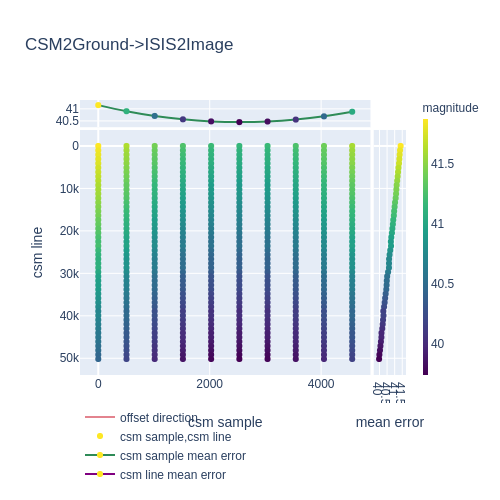

In [18]:
Image(csm2isis_plot.to_image())

In [19]:
csm2isis_data[['diff line', 'diff sample']].describe()

,diff line,diff sample
count,500.000000,500.000000
mean,-5.005221,-40.376823
std,0.011530,0.479437
min,-5.026685,-41.572050
25%,-5.015138,-40.739516
50%,-5.006619,-40.374931
75%,-4.995636,-39.992303
max,-4.974713,-39.424638


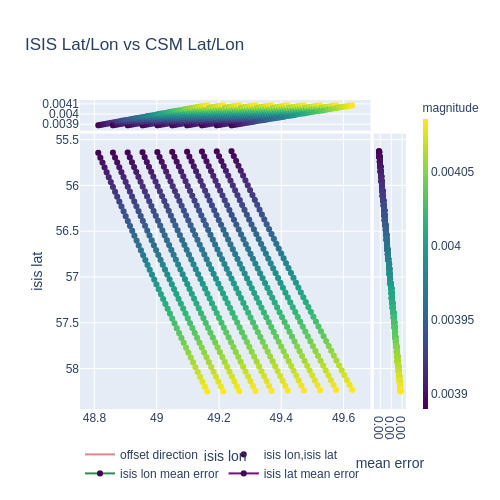

In [20]:
Image(isiscsm_plotlatlon.to_image())

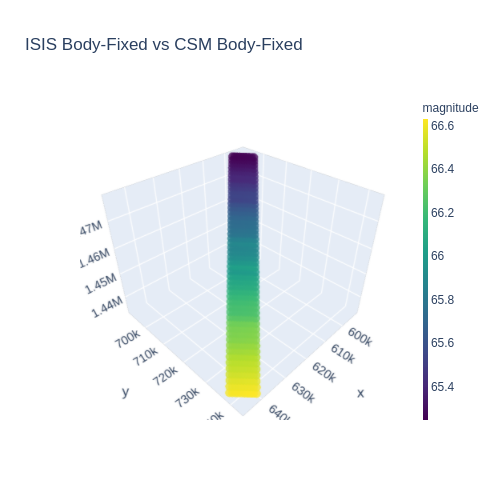

In [21]:
Image(isiscsm_plotbf.to_image())

In [22]:
isiscsm_bfdata[['diffx', 'diffy', 'diffz']].describe()

,diffx,diffy,diffz
count,500.000000,500.000000,500.000000
mean,-3.102889,-41.188359,-1.595461
std,0.002293,0.332926,0.103984
min,-3.108190,-41.798024,-1.832420
25%,-3.104515,-41.476419,-1.670865
50%,-3.102860,-41.185562,-1.595740
75%,-3.101235,-40.900668,-1.520069
max,-3.097781,-40.568457,-1.355613
